## Importing & Loading What We Need

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading Our Dataset
data = pd.read_csv("train-2.csv")

In [2]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Data Preprocessing

In [3]:
# Getting more information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

* Insight: There's No Null Values in our data except the 'Postal Code' Column

In [4]:
# calculating number of null values in column postal code 
postal_null = data['Postal Code'].isnull().sum()
print("\nNumber Of Null Values in Postal Code:",postal_null)


Number Of Null Values in Postal Code: 11


### Dealing with Nulls

In [5]:
# Replacing Null Values with Zero   
data["Postal Code"].fillna(0, inplace = True) 

data['Postal Code'] = data['Postal Code'].astype(int)

/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2811/3931865964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Postal Code"].fillna(0, inplace = True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

* Now The Data is Ready & Without any Nulls

In [7]:
# Getting some statistical measures about the data
print("\nStatistical Summary::")
data.describe()


Statistical Summary::


,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


### Checking For Duplicates

In [8]:
if data.duplicated().sum() > 0:   
    print("Duplicates do exist in the Data.")
else:
    print("No duplicates found in the Data.")

No duplicates found in the Data.


## EDA & Data Visualisation 

### Customer Analysis

#### Customer segmentation

In [9]:
# Types of customers by Grouping customers based on segments
types_of_customers = data['Segment'].unique()
print("\nTypes Of Customers:",types_of_customers)


Types Of Customers: ['Consumer' 'Corporate' 'Home Office']


In [10]:
# Number of customers in each segment 
customer_segmentation = data['Segment'].value_counts().reset_index() 
customer_segmentation = customer_segmentation.rename(columns={'Segment': 'Customer Type', 'count': 'Total Customers'})

print(customer_segmentation)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


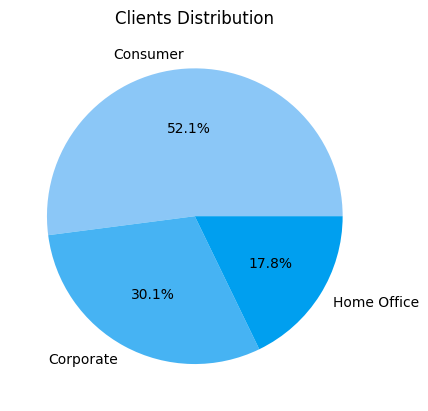

In [11]:
# Ploting A Pie Chart 
plt.pie(customer_segmentation['Total Customers'], labels=customer_segmentation['Customer Type'], autopct='%1.1f%%', colors = ["#8BC7F7","#46B3F3","#009FEF"])

# Set the title of the pie chart
plt.title('Clients Distribution')
plt.show()

* Insight: The Consumer segment dominates the customer base, making up 52.1% (5,101 customers), followed by Corporate (30.1%) and Home Office (17.8%).

In [12]:
# Grouping the data by the 'Segment' column and calculate the total sales for each segment

sales_per_segment = data.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type', 'Sales': 'Total Sales'})

print(sales_per_segment)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


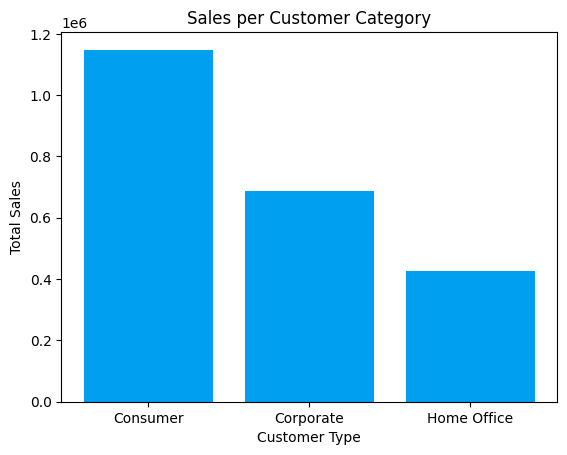

In [13]:
# Ploting a bar graph
plt.bar(sales_per_segment['Customer Type'], sales_per_segment['Total Sales'], color = "#009FEF")

# Labels
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

* Insight: Consumers contribute the largest share of total sales, accounting for over $1.14 million, which is significantly higher than Corporate (688K) and Home Office (425K)

### Customer Loyalty

* Calculate the repeat purchase behavior of customers

In [14]:
# Group the data by Customer ID, Customer Name, Segments, and calculate the frequency of orders for each customer
customer_order_frequency = data.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

# Rename the column to represent the frequency of orders
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)

# Identify repeat customers (customers with order frequency greater than 1)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]

# Sort "repeat_customers" in descending order based on the "Order Frequency" column
repeat_customers_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)

# Print the result- the first 10 and reset index
print(repeat_customers_sorted.head(12).reset_index(drop=True))

   Customer ID        Customer Name      Segment  Total Orders
0     WB-21850        William Brown     Consumer            35
1     PP-18955           Paul Prost  Home Office            34
2     MA-17560         Matt Abelman  Home Office            34
3     JL-15835             John Lee     Consumer            33
4     CK-12205  Chloris Kastensmidt     Consumer            32
5     SV-20365          Seth Vernon     Consumer            32
6     JD-15895     Jonathan Doherty    Corporate            32
7     AP-10915       Arthur Prichep     Consumer            31
8     ZC-21910     Zuschuss Carroll     Consumer            31
9     EP-13915           Emily Phan     Consumer            31
10    LC-16870        Lena Cacioppo     Consumer            30
11    Dp-13240          Dean percer  Home Office            29


### Sales by Customer

* Identify top 10 spending customers based on their total purchase amount

In [15]:
# Group the data by customer IDs and calculate the total purchase (sales) for each customer
customer_sales = data.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

# Sort the customers based on their total purchase in descending order to identify top spenders
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)

# Print the top-spending customers
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


## Shipping

In [16]:
# Types of Shipping methods 
types_of_shipping = data['Ship Mode'].unique()
print("\nTypes Of Shipping:",types_of_shipping)


Types Of Shipping: ['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [17]:
# Most Used shipping method 
shipping_model = data['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'Ship Mode':'Shipping Method', 'count': 'Use Frequency'})

print(shipping_model)

  Shipping Method  Use Frequency
0  Standard Class           5859
1    Second Class           1902
2     First Class           1501
3        Same Day            538


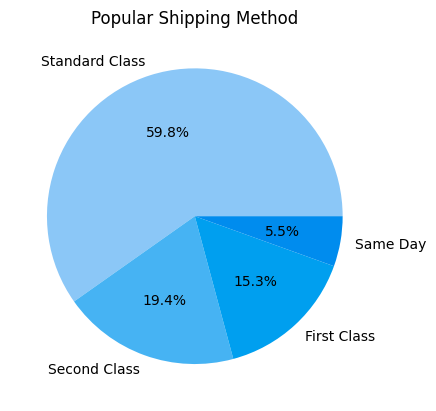

In [18]:
# Plotting a Pie chart
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Shipping Method'], autopct='%1.1f%%', colors = ["#8BC7F7","#46B3F3","#009FEF","#008CEE"])

# Set A Title
plt.title('Popular Shipping Method')
plt.show()

* Insight: The most commonly used shipping method is Standard Class, accounting for 59.8% (5,859 shipments). It significantly surpasses the other modes:
  
   * Second Class: 19.4%
   * First Class: 15.3%
   * Same Day: Only 5.5%
Key Takeaways:

   * The dominance of Standard Class suggests that customers prioritize cost-efficiency over speed.
   * Same Day shipping is the least used, indicating it may be less affordable or less in demand.

## Geographical Analysis

In [19]:
# Customers per state 
state = data['State'].value_counts().reset_index()
state = state.rename(columns={'index':'State', 'count':'Num_Of_Customers'})

print(state.head(10))

            State  Num_Of_Customers
0      California              1946
1        New York              1097
2           Texas               973
3    Pennsylvania               582
4      Washington               504
5        Illinois               483
6            Ohio               454
7         Florida               373
8        Michigan               253
9  North Carolina               247


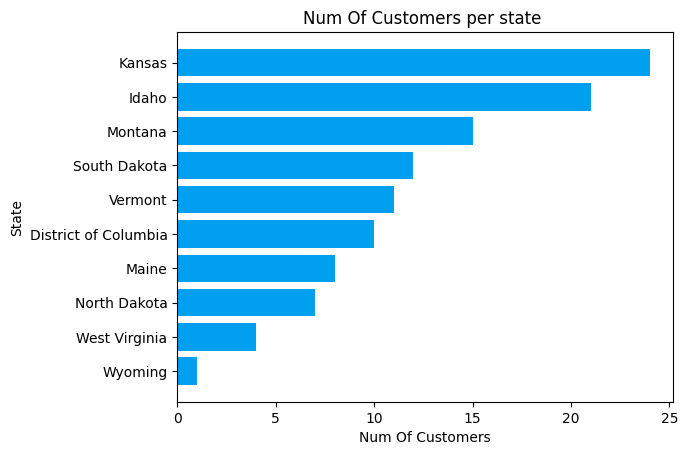

In [20]:
# Ploting a bar graph
state = state.sort_values(by='Num_Of_Customers', ascending=True).head(10)
plt.barh(state['State'], state['Num_Of_Customers'], color = "#009FEF")

# Labels
plt.title('Num Of Customers per state ')
plt.ylabel('State')
plt.xlabel('Num Of Customers')
plt.show()

* Insight: California has the highest number of customers (1,946), significantly surpassing other states. The top three states: California, New York (1,097), and Texas (973) account for a major portion of the customer base.

 Key Takeaways:

  * California dominates the market, making it a prime region for targeted marketing and customer retention strategies.
  * New York and Texas are also high-performing states, indicating strong demand.

In [21]:
# Group the data by state and calculate the total purchase (sales) for each city
city_sales = data.groupby(['City'])['Sales'].sum().reset_index()

# Sort the cities based on their sales in descending order to identify top cities
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

# Print the states 
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


In [22]:
state_city_sales = data.groupby(['State','City'])['Sales'].sum().reset_index()

print(state_city_sales.head(10))

     State           City     Sales
0  Alabama         Auburn  1766.830
1  Alabama        Decatur  3374.820
2  Alabama       Florence  1997.350
3  Alabama         Hoover   525.850
4  Alabama     Huntsville  2484.370
5  Alabama         Mobile  5462.990
6  Alabama     Montgomery  3722.730
7  Alabama     Tuscaloosa   175.700
8  Arizona       Avondale   946.808
9  Arizona  Bullhead City    22.288


## Product Analysis

### Product Category Analysis

* Identifiying the sales performance of different product

In [23]:
# Types of products in the Stores 
products = data["Category"].unique()
print("\nTypes Of Products:",products)


Types Of Products: ['Furniture' 'Office Supplies' 'Technology']


In [24]:
product_subcategory = data["Sub-Category"].unique()
print("\nTypes Of Product_Sub_Category:\n")
print(product_subcategory)


Types Of Product_Sub_Category:

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [25]:
# Num of sub category 
product_subcategory = data["Sub-Category"].nunique()
print("\nNum Of Sub-Categories:",product_subcategory)


Num Of Sub-Categories: 17


In [26]:
# Group the data by product category & how many sub-category it has 
subcategory_count = data.groupby('Category')['Sub-Category'].nunique().reset_index()
# sort by ascending order
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
# Print the states 
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [27]:
# Combining it with Sales too
subcategory_count_sales = data.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()
print(subcategory_count_sales)

           Category Sub-Category        Sales
0         Furniture    Bookcases  113813.1987
1         Furniture       Chairs  322822.7310
2         Furniture  Furnishings   89212.0180
3         Furniture       Tables  202810.6280
4   Office Supplies   Appliances  104618.4030
5   Office Supplies          Art   26705.4100
6   Office Supplies      Binders  200028.7850
7   Office Supplies    Envelopes   16128.0460
8   Office Supplies    Fasteners    3001.9600
9   Office Supplies       Labels   12347.7260
10  Office Supplies        Paper   76828.3040
11  Office Supplies      Storage  219343.3920
12  Office Supplies     Supplies   46420.3080
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
15       Technology     Machines  189238.6310
16       Technology       Phones  327782.4480


In [28]:
# Group the data by product category VS. the sales from each product category 
product_category = data.groupby(['Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_category = product_category.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_category.reset_index(drop=True))

          Category        Sales
0       Technology  827455.8730
1        Furniture  728658.5757
2  Office Supplies  705422.3340


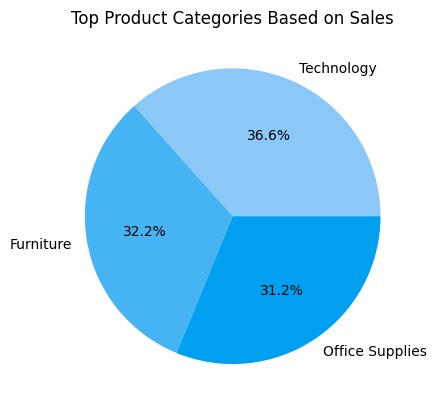

In [29]:
# Plotting a pie chart 
plt.pie(top_product_category['Sales'], labels=top_product_category['Category'], autopct='%1.1f%%', colors = ["#8BC7F7","#46B3F3","#009FEF","#008CEE"])

# set the labels of the pie chart 
plt.title('Top Product Categories Based on Sales')
        
plt.show()

* Insight: The Technology category generates the highest sales revenue (827K, 36.6% of total sales), followed by Furniture (728K, 32.2%) and Office Supplies (705K, 31.2%).

 Key Takeaways:

  * Technology is the leading sales driver, indicating strong demand for tech-related products.
  * Furniture and Office Supplies have nearly equal sales, suggesting a well-balanced contribution from both categories.

In [30]:
# Group the data by product sub category versus the sales  
product_subcategory = data.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_subcategory = product_subcategory.sort_values(by='Sales', ascending=False) 

# Print the states 
print(top_product_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


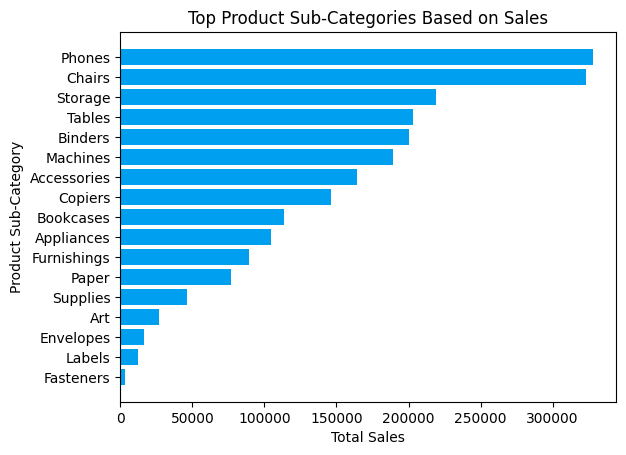

In [31]:
top_product_subcategory = top_product_subcategory.sort_values(by='Sales', ascending=True)

# Ploting a bar graph

plt.barh(top_product_subcategory['Sub-Category'], top_product_subcategory['Sales'], color = "#009FEF")

# Labels
plt.title('Top Product Sub-Categories Based on Sales')
plt.ylabel('Product Sub-Category')
plt.xlabel('Total Sales')
plt.xticks(rotation=0)

plt.show()

* Insight: The Phones and Chairs sub-categories clearly dominate in terms of sales, generating approximately 327K and 323K respectively. These two alone account for a substantial share of the total revenue, with Phones leading as the highest-selling sub-category and Chairs following closely.

    Moderate performers include Storage, Tables, Binders, and Machines, each contributing over 180K in sales, indicating steady and reliable revenue streams.

    On the other hand, low-performing sub-categories such as Fasteners, Labels, Envelopes, and Art show minimal sales, with Fasteners at the bottom, generating only around 3K.


## Sales Trends

In [32]:
# Convert the "Order Date" column to datetime format & Printing the total sales for each year
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = data.groupby(data['Order Date'].dt.to_period("Y"))['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Sales':'Total Sales'})
 
print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


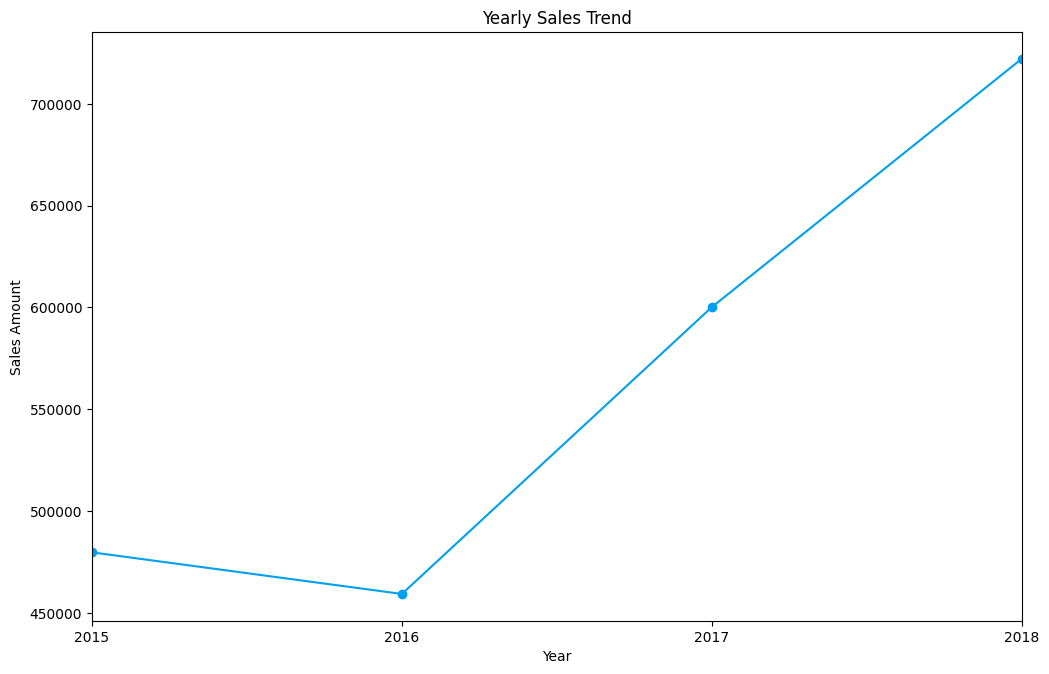

In [33]:
# Convert the "Order Date" column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Group the data by years and calculate the total sales amount for each year
yearly_sales = data.groupby(data['Order Date'].dt.to_period('Y'))['Sales'].sum()

# Plot the sales trends for quarters
plt.figure(figsize=(12, 26))

# Yearly Sales Trend
plt.subplot(3, 1, 3)
yearly_sales.plot(kind='line', marker='o', color = "#009FEF")
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales Amount')

# Adjust layout and display the plots

plt.show()


* Insight: The yearly sales trend shows a strong upward trajectory in recent years. After a slight dip in 2016 (dropping from 479K in 2015 to 459K), sales rebounded significantly in 2017, reaching 600K, and continued to climb in 2018, peaking at over 722K.

    This consistent growth from 2016 to 2018 reflects improved business performance, likely due to effective sales strategies, stronger product positioning, or increased market demand. The sharp rise in 2018 suggests that the company successfully capitalized on market opportunities and scaled operations efficiently.

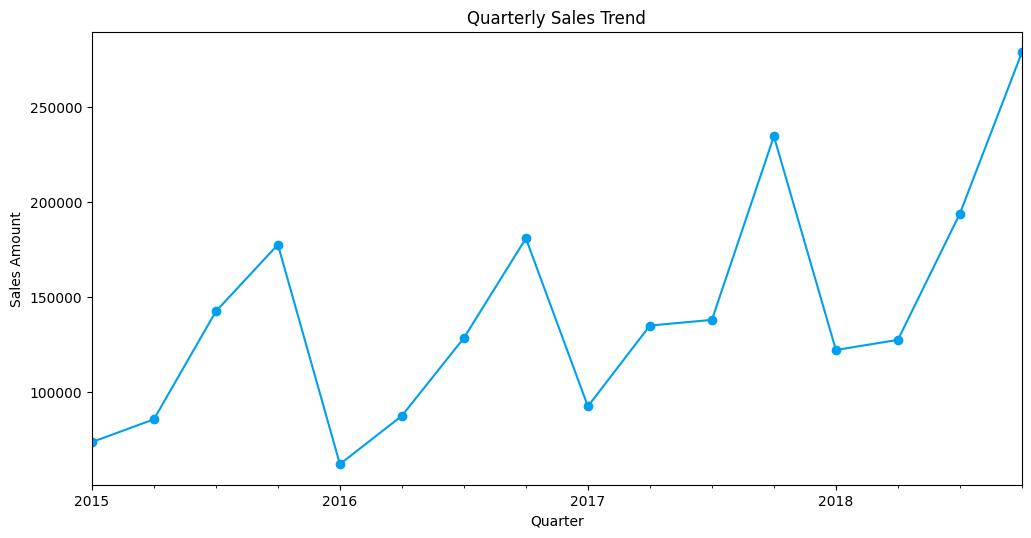

In [34]:
# Convert the "Order Date" column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Group the data by quarters and calculate the total sales amount for each quarter
quarterly_sales = data.groupby(data['Order Date'].dt.to_period('Q'))['Sales'].sum()

# Plot the sales trends for months, quarters, and years
plt.figure(figsize=(12, 20))

# Quarterly Sales Trend
plt.subplot(3, 1, 2)
quarterly_sales.plot(kind='line', marker='o', color = "#009FEF")
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')

#plt.tight_layout()
plt.show()

* Insight: Quarterly sales demonstrate a cyclical pattern with notable fluctuations. Despite periodic dips—particularly at the start of each year (early 2016 and early 2017) sales consistently rebound and peak towards the end of each year, with Q4 of 2018 marking the highest quarterly performance at approximately 280K.

    This pattern suggests strong seasonality in consumer demand, likely driven by year-end promotions, holidays, or budget cycles. Recognizing these high-performing quarters allows for better resource planning and targeted marketing to maximize revenue during peak seasons.

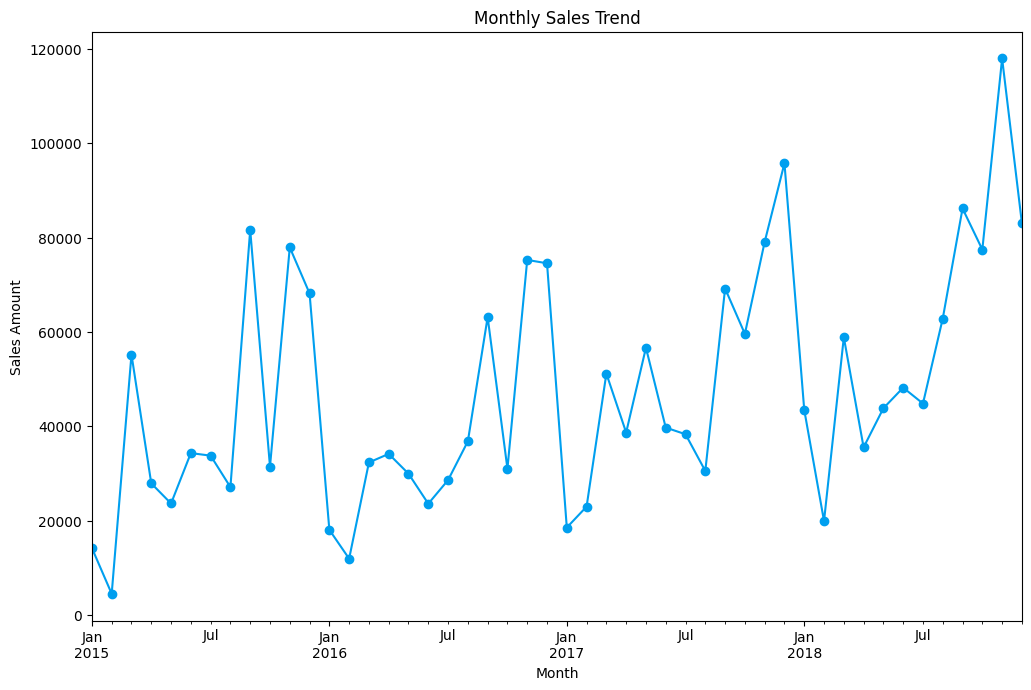

In [35]:
# Convert the "Order Date" column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)

# Group the data by months and calculate the total sales amount for each month
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()

# # Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o', color = "#009FEF")
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales Amount')

# plt.tight_layout()
plt.show()

* Insight: Monthly Sales Trend" reveals several key insights into the sales performance over time:

    1.  Overall Upward Trend: There is a noticeable increase in sales from early 2015 to the end of 2018, indicating growth over the years despite some fluctuations.

    2. Seasonal Spikes: Sales exhibit recurring peaks, especially towards the end of each year (likely Q4), which may suggest seasonality—possibly due to holidays, promotions, or year-end purchases.

   
    3. Volatility: The sales data shows high month-to-month variability. Some months experience sharp spikes followed by steep drops, which could indicate inconsistent demand or reliance on sporadic large orders or campaigns.

    4. Strong Growth in 2018: The year 2018, particularly the second half, shows a sharp rise in sales, with the highest recorded value occurring in late 2018. This could reflect successful marketing efforts, product launches, or market expansion.
